In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib as mpl
from projet_6_bis_iteration_friendly import *

# --- Paramètres du domaine et numérique ---
nx, ny = 31, 31
Lx, Ly = 1.0, 1.0
dt = 1e-4  # à ajuster si ça diverge à grand Re/Ra

# --- Grilles de paramètres ---
U0_list = [1e-3]              # -> plusieurs Re
Ra_list = [1e4, 2e4, 4e4, 6e4, 8e4, 1e5, 2e5, 4e5, 6e5, 8e5, 1e6]                # -> plusieurs Ra

Nu_map = np.zeros((len(U0_list), len(Ra_list)))
Re_list = np.zeros(len(U0_list))

for i, U0 in enumerate(U0_list):
    for j, Ra in enumerate(Ra_list):
        Nu, Re = global_resolution(nx, ny, Lx, Ly, dt, U0, Ra)
        Nu_map[i, j] = Nu
        Re_list[i] = Re
        print(f"U0={U0:.3g} | Re={Re:.3e} | Ra={Ra:.1e} -> Nu={Nu:.4f}")


Le nombre de Courant est égale à : 3.0000000000000005e-06
Re = 100.0
Itération 0: Résidu w = inf, Résidu T = 1.22e-03
Itération 10: Résidu w = 9.82e-02, Résidu T = 1.19e-03
Itération 20: Résidu w = 4.83e-02, Résidu T = 1.16e-03
Itération 30: Résidu w = 3.16e-02, Résidu T = 1.13e-03
Itération 40: Résidu w = 2.33e-02, Résidu T = 1.10e-03
Itération 50: Résidu w = 1.84e-02, Résidu T = 1.08e-03
Itération 60: Résidu w = 1.50e-02, Résidu T = 1.05e-03
Itération 70: Résidu w = 1.27e-02, Résidu T = 1.02e-03
Itération 80: Résidu w = 1.09e-02, Résidu T = 1.00e-03
Itération 90: Résidu w = 9.56e-03, Résidu T = 9.76e-04
Itération 100: Résidu w = 8.48e-03, Résidu T = 9.53e-04
Itération 110: Résidu w = 7.59e-03, Résidu T = 9.30e-04
Itération 120: Résidu w = 6.86e-03, Résidu T = 9.09e-04
Itération 130: Résidu w = 6.24e-03, Résidu T = 8.88e-04
Itération 140: Résidu w = 5.71e-03, Résidu T = 8.68e-04
Itération 150: Résidu w = 5.26e-03, Résidu T = 8.48e-04
Itération 160: Résidu w = 4.87e-03, Résidu T = 8.29

C:\Users\33672\AppData\Local\Temp\ipykernel_21372\1105203990.py:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = plt.imshow(


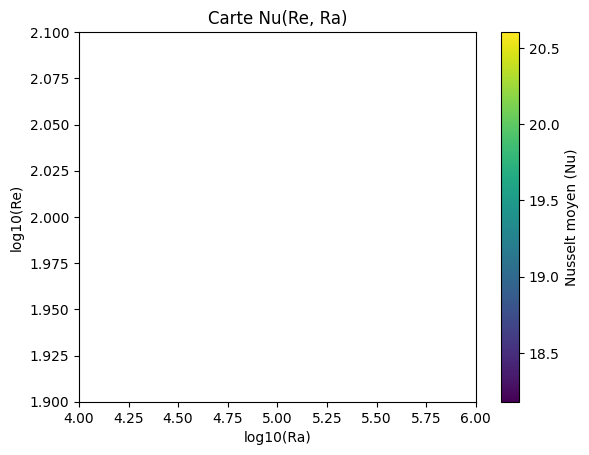

In [27]:
plt.figure()
# imshow a besoin d'un tableau 2D; on met Ra en x, Re en y
im = plt.imshow(
    Nu_map,
    aspect="auto",
    origin="lower",
    extent=[np.log10(Ra_list[0]), np.log10(Ra_list[-1]), np.log10(Re_list[0]), np.log10(Re_list[-1])]
)
plt.colorbar(im, label="Nusselt moyen (Nu)")
plt.xlabel("log10(Ra)")
plt.ylabel("log10(Re)")
plt.title("Carte Nu(Re, Ra)")
plt.show()


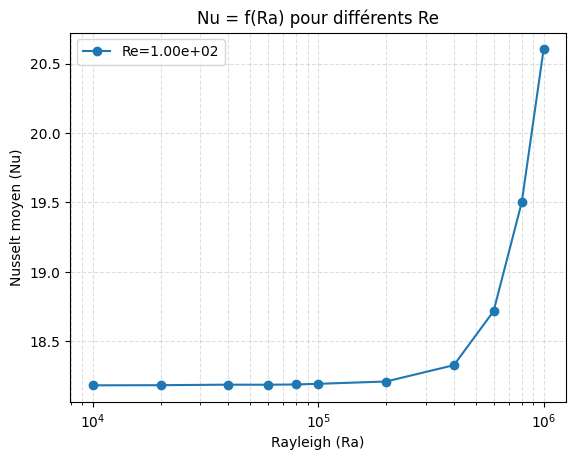

In [30]:
plt.figure()
for i, Re in enumerate(Re_list):
    plt.plot(Ra_list, Nu_map[i, :], marker="o", label=f"Re={Re:.2e}")

plt.xscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Nusselt moyen (Nu)")
plt.title("Nu = f(Ra) pour différents Re")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()
